<a href="https://colab.research.google.com/github/DSF-Kotaro/blog/blob/main/%E5%9B%B3%E8%A7%A3%E9%80%9F%E7%BF%92Deep_Learning_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from matplotlib import pyplot
import numpy as np
import pandas as pd

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


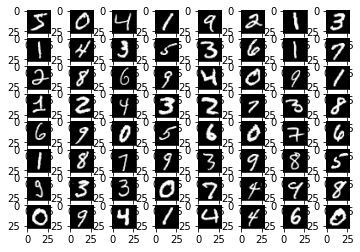

In [4]:
for i in range(0, 64):
    pyplot.subplot(8, 8, i + 1)
    pyplot.imshow(x_train[i], cmap='gray')

# 画像を表示
pyplot.show()

In [5]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [7]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.5012381 ,  0.17730367, -0.5019206 ,  0.8049509 , -0.62996155,
         0.68574655,  0.2304101 ,  0.30932316,  0.19226755,  0.32859418]],
      dtype=float32)

In [8]:
tf.nn.softmax(predictions).numpy()

array([[0.04892338, 0.09642806, 0.04889001, 0.18062888, 0.04301428,
        0.16033095, 0.10168743, 0.11003701, 0.09788186, 0.1121781 ]],
      dtype=float32)

In [9]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [10]:
loss_fn(y_train[:1], predictions).numpy()

1.8305151

In [11]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4777 - accuracy: 0.8600
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1492 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1038 - accuracy: 0.9688
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0871 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0724 - accuracy: 0.9767


In [13]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0752 - accuracy: 0.9772


[0.07523161917924881, 0.9771999716758728]

In [14]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [15]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.4775481e-08, 4.1230747e-10, 1.1134644e-06, 5.1094712e-06,
        6.3082803e-11, 2.0433507e-08, 1.3822065e-13, 9.9999356e-01,
        1.2728100e-08, 2.6803184e-07],
       [7.4347625e-08, 1.6836096e-04, 9.9982697e-01, 3.5944215e-06,
        1.5648808e-15, 8.0925753e-07, 1.9958792e-07, 4.5497139e-12,
        1.0820219e-07, 9.2781763e-12],
       [9.9047065e-07, 9.9940610e-01, 4.4841490e-05, 9.9625759e-06,
        5.6627461e-05, 1.6493470e-06, 2.1352025e-05, 3.7160350e-04,
        8.6484943e-05, 4.4676892e-07],
       [9.9996018e-01, 3.2622814e-11, 1.5952572e-05, 4.4642396e-09,
        1.8916631e-07, 2.8232131e-07, 1.7408895e-05, 1.4060288e-07,
        1.4308957e-09, 5.8345145e-06],
       [1.1503149e-06, 1.3876240e-10, 3.4930845e-06, 1.4362245e-08,
        9.9958760e-01, 1.6710192e-06, 5.6851045e-06, 7.5143848e-06,
        6.4182399e-07, 3.9219233e-04]], dtype=float32)>

In [16]:
X = model.predict(x_test)
X.shape

(10000, 10)

In [17]:
X = pd.DataFrame(X)
Y = pd.DataFrame(y_test)

In [18]:
X

,0,1,2,3,4,5,6,7,8,9
0,-4.426055,-8.521892,-0.620677,0.902942,-10.399215,-4.618731,-16.522568,13.087351,-5.092097,-2.044804
1,-4.068842,3.656272,12.345500,-0.190455,-21.745296,-1.681476,-3.081340,-13.770284,-3.693593,-13.057683
2,-6.615387,7.209105,-2.802678,-4.306977,-2.569318,-6.105434,-3.544665,-0.687984,-2.145843,-7.411527
3,12.239127,-11.906840,1.193278,-6.987998,-3.241471,-2.841052,1.280638,-3.538158,-8.125796,0.187449
4,-4.132657,-13.155438,-3.021907,-8.515845,9.542404,-3.759258,-2.534843,-2.255873,-4.716133,1.699061
...,...,...,...,...,...,...,...,...,...,...
9995,-4.240785,-0.286035,14.497272,2.072806,-19.077530,-7.235129,-10.876591,-0.376218,-2.617605,-13.069844
9996,-10.073526,-2.925391,-3.448418,11.904859,-16.580740,2.540895,-21.373661,-6.098536,-4.799126,1.776519
9997,-13.320206,-8.542271,-11.750189,-8.727057,14.177883,-9.657583,-8.367185,0.653248,-1.025286,1.594548
9998,-2.212524,-7.300472,-9.520898,-6.493755,-4.336507,9.166198,-3.107893,-5.694874,2.688625,-15.003273


In [19]:
Y

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5
